<h1 style="text-align: center;">Key NLP Techniques for Data Scientists</h1> 

Practical Examples Using Python and JupyterLab.

1. Tokenization: split text into sentences and words.
2. Stemming: stripping the affixes from words.
3. Lemmatization: converting words to their base form.
4. Word Embeddings: representations for words.
5. Stop Words Removal: remove words of little value like "the", "and", "a", "an".
6. Sentiment Analysis: opinion mining.

## Install Dependencies

In [ ]:
!pip3 install nltk
!pip3 install scikit-learn
!pip3 install pandas

In [2]:
#sample sentence extracted from 20NewsGroups dataset for text classification
example_sentence = """A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested."""

## Cleaning

In [3]:
#Cleaning is optional and depends on the text type and the task design
#Symbols can be irrelevant for some tasks but important for others
import re 
def clean_str(String):
    String = re.sub(r"\\n", "", String) # to remove new-line characters
    # String = re.sub(r"[^A-Za-z]", " ", String)#to remove symbols 
    String = re.sub(r"\s+", " ", String)#replace multiple spaces with only one space
    String = String.strip().lower()
    return String

In [4]:
cleaned_text = clean_str(example_sentence)
print(cleaned_text)

a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll. please send a brief message detailing your experiences with the procedure. top speed attained, cpu rated speed, add on cards and adapters, heat sinks, hour of usage per day, floppy disk functionality with 800 and 1.4 m floppies are especially requested.


## Tokenization

In [5]:
import nltk
nltk.download('punkt') #model for sentence tokenizer

[nltk_data] Downloading package punkt to /Users/lubani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
#Sentence Tokenizer
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(cleaned_text)
print('number of sentences: ', len(tokenized_sent))
print(tokenized_sent)

number of sentences:  3
['a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll.', 'please send a brief message detailing your experiences with the procedure.', 'top speed attained, cpu rated speed, add on cards and adapters, heat sinks, hour of usage per day, floppy disk functionality with 800 and 1.4 m floppies are especially requested.']


In [7]:
#Word Tokenizer
from nltk.tokenize import word_tokenize
tokenized = word_tokenize(cleaned_text)
print(tokenized)

['a', 'fair', 'number', 'of', 'brave', 'souls', 'who', 'upgraded', 'their', 'si', 'clock', 'oscillator', 'have', 'shared', 'their', 'experiences', 'for', 'this', 'poll', '.', 'please', 'send', 'a', 'brief', 'message', 'detailing', 'your', 'experiences', 'with', 'the', 'procedure', '.', 'top', 'speed', 'attained', ',', 'cpu', 'rated', 'speed', ',', 'add', 'on', 'cards', 'and', 'adapters', ',', 'heat', 'sinks', ',', 'hour', 'of', 'usage', 'per', 'day', ',', 'floppy', 'disk', 'functionality', 'with', '800', 'and', '1.4', 'm', 'floppies', 'are', 'especially', 'requested', '.']


In [46]:
#Tweet Tokenizer compared to word_tokenize
from nltk.tokenize import TweetTokenizer
tweet = "Dont take cryptocurrency advice from people on Twitter 😃👍 #crypto"
tokenizer = TweetTokenizer()
tokenized_tweet = tokenizer.tokenize(tweet)
print(tokenized_tweet)
print(word_tokenize(tweet))

['Dont', 'take', 'cryptocurrency', 'advice', 'from', 'people', 'on', 'Twitter', '😃', '👍', '#crypto']
['Dont', 'take', 'cryptocurrency', 'advice', 'from', 'people', 'on', 'Twitter', '😃👍', '#', 'crypto']


## Stemming and Lemmatization

### 1- NLTK

In [9]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

print(porter.stem('argue'))
print(porter.stem('argued'))
print(porter.stem('argues'))
print(porter.stem('arguing'))

argu
argu
argu
argu


In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("argue", 'v'))
print(lemmatizer.lemmatize("argued", 'v')) 
print(lemmatizer.lemmatize("argues", 'v'))
print(lemmatizer.lemmatize("arguing", 'n'))

argue
argue
argue
arguing


In [11]:
#WordNetLemmatizer requires the correct POS tag to be accurate, default is noun
print(lemmatizer.lemmatize("went"))

went


### 2- spaCy

In [ ]:
!pip3 install spacy
!python3 -m spacy download en_core_web_md

In [13]:
import spacy
nlp = spacy.load('en_core_web_md') #load the core English language model

In [14]:
doc=nlp('After the cats fell asleep, the mice went out to play.')
for token in doc:
    print(token,'-->',token.lemma_)

After --> after
the --> the
cats --> cat
fell --> fall
asleep --> asleep
, --> ,
the --> the
mice --> mouse
went --> go
out --> out
to --> to
play --> play
. --> .


In [15]:
#lemmatize out original example sentence
original=[]
lemmatized=[]
print(cleaned_text)
doc=nlp(cleaned_text)
for token in doc:
    original.append(token.text)
    lemmatized.append(token.lemma_.lower())
    

res = "\n".join("{} {}".format(x, y) for x, y in zip(original, lemmatized))
print(res)

a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll. please send a brief message detailing your experiences with the procedure. top speed attained, cpu rated speed, add on cards and adapters, heat sinks, hour of usage per day, floppy disk functionality with 800 and 1.4 m floppies are especially requested.
a a
fair fair
number number
of of
brave brave
souls soul
who who
upgraded upgrade
their their
si si
clock clock
oscillator oscillator
have have
shared share
their their
experiences experience
for for
this this
poll poll
. .
please please
send send
a a
brief brief
message message
detailing detail
your your
experiences experience
with with
the the
procedure procedure
. .
top top
speed speed
attained attain
, ,
cpu cpu
rated rate
speed speed
, ,
add add
on on
cards card
and and
adapters adapter
, ,
heat heat
sinks sink
, ,
hour hour
of of
usage usage
per per
day day
, ,
floppy floppy
disk disk
functionality functionality
with wi

## Word Embeddings

* Both spaCy and NLTK are open-source Natural Language Processing libraries.<br>
* spaCy is more efficient than NLTK and has support for word embeddings (vectors) whereas NLTK does not.<br> 
* NLTK allows for selecting a specific algorithm to perform tasks unlike spaCy.<br>

In [16]:
doc=nlp('cats purring and dogs barking.')

In [17]:
[token for token in doc]

[cats, purring, and, dogs, barking, .]

### 1- Similarity

In [18]:
#find the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([doc[0].vector], [doc[3].vector])[0][0]

0.87537116

In [19]:
doc[0].similarity(doc[3]) #spaCy’s similarity  

0.8753713965415955

In [20]:
print(len(doc[0].vector))

300


### 2- Visualisation

In [ ]:
!pip3 install matplotlib

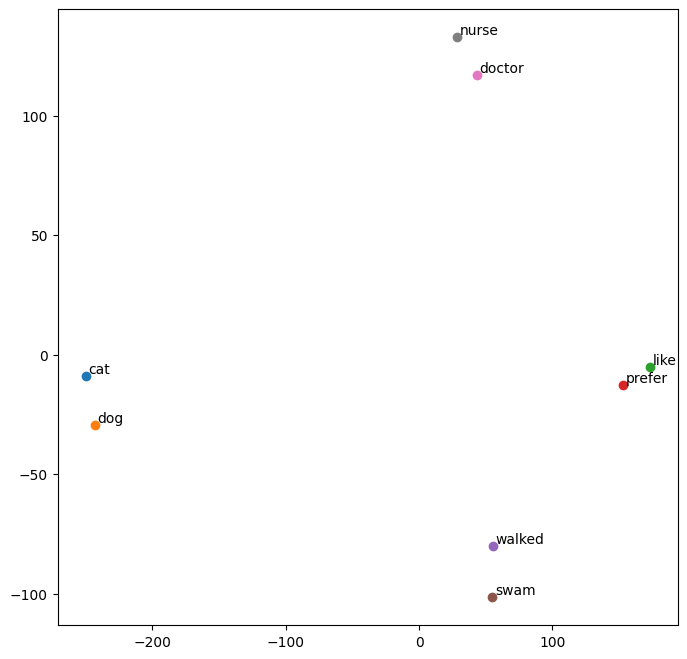

In [22]:
from sklearn.manifold import TSNE #dimensionality reduction method (optimization problem)
import matplotlib.pyplot as plt
import numpy as np

words = ['cat', 'dog', 'like', 'prefer', 'walked', 'swam', 'doctor', 'nurse']

doc=nlp(' '.join(words))

#Creates and TSNE model and plots it
labels = []
vectors = []

for token in doc:
    vectors.append(token.vector)
    labels.append(token.text)

tsne_model = TSNE(perplexity=1.3, n_components=2, init='pca', n_iter=1000, random_state=42)
new_values = tsne_model.fit_transform(np.array(vectors)) #reduce to a lower dimension with minimal similarity changes 

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(8, 8)) 
for i in range(len(x)):
    plt.scatter(x[i], y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(2, 2),
                 textcoords='offset points')
plt.show()

## Stop Word Removal


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lubani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
print(len(stop))
print(stop[:100])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [25]:
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
stop_words=list(STOP_WORDS)
print(len(stop_words))
print(stop_words[:100])

326
['afterwards', 'moreover', 'our', 'since', 'thereby', 'fifty', 'third', 'really', 'but', 'less', '‘m', "'ve", 'both', 'ten', 're', 'he', 'somewhere', 'other', 'across', 'latterly', 'most', 'during', 'whereupon', 'which', 'very', 'many', 'meanwhile', 'her', 'never', 'hereafter', 'serious', 'hundred', 'on', 'seems', 'everyone', 'can', 'us', '’re', 'by', 'your', 'another', '‘ll', 'indeed', '‘d', 'either', 'per', 'anyhow', 'show', 'yourselves', 'she', 'such', 'to', 'whence', 'back', 'against', 'his', 'become', 'keep', 'get', 'around', 'were', 'all', 'any', 'something', "'d", 'no', 'not', 'someone', '’s', 'more', 'through', "'re", 'none', 'how', 'noone', 'one', 'sometimes', 'sometime', 'or', 'throughout', 'bottom', 'being', 'would', 'will', 'whenever', 'as', 'once', 'whom', 'whereafter', 'whose', 'may', 'name', 'forty', '’m', 'off', 'anyone', 'i', 'those', 'mine', 'mostly']


In [26]:
stop_words_removed=[]
removed_arr = []
for word in lemmatized:
    if word not in stop_words:     
        stop_words_removed.append(word)
    else:
        removed_arr.append(word)

In [27]:
print(stop_words_removed)

['fair', 'number', 'brave', 'soul', 'upgrade', 'si', 'clock', 'oscillator', 'share', 'experience', 'poll', '.', 'send', 'brief', 'message', 'detail', 'experience', 'procedure', '.', 'speed', 'attain', ',', 'cpu', 'rate', 'speed', ',', 'add', 'card', 'adapter', ',', 'heat', 'sink', ',', 'hour', 'usage', 'day', ',', 'floppy', 'disk', 'functionality', '800', '1.4', 'm', 'floppy', 'especially', 'request', '.']


In [28]:
print(removed_arr)

['a', 'of', 'who', 'their', 'have', 'their', 'for', 'this', 'please', 'a', 'your', 'with', 'the', 'top', 'on', 'and', 'of', 'per', 'with', 'and', 'be']


## Sentiment Analysis

* Example using spaCy and Twitter sentimental analysis dataset from [here](https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset?select=Twitter_Data.csv). 

In [30]:
import pandas as pd

data=pd.read_csv('archive-2/Twitter_Data.csv')
data.head(5) #get the first 5 rows

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [31]:
data=data.dropna() #removes the rows that contains NULL values

In [32]:
len(data['clean_text'].values)

162969

In [33]:
data=data[:1000] #for simplicity we will take the first 1000 sentences only.

In [34]:
data['clean_text'].values[0] #cleaned text, but still need to apply tokeniation, lemmatization and stop words removal

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

### 1- Data pre-processing

In [35]:
tokenized=[]
lemmatized=[]

for article in data['clean_text'].values:
    doc=nlp(article) #apply spaCy pipeline
    art_tokenized=[]
    art_lemmatized=[]
    for token in doc:
        art_tokenized.append(token.text)
        art_lemmatized.append(token.lemma_)
        
    tokenized.append(art_tokenized)
    lemmatized.append(art_lemmatized)

In [36]:
print(tokenized[0])

['when', 'modi', 'promised', '“', 'minimum', 'government', 'maximum', 'governance', '”', 'expected', 'him', 'begin', 'the', 'difficult', 'job', 'reforming', 'the', 'state', 'why', 'does', 'take', 'years', 'get', 'justice', 'state', 'should', 'and', 'not', 'business', 'and', 'should', 'exit', 'psus', 'and', 'temples']


In [37]:
print(lemmatized[0])

['when', 'modi', 'promise', '"', 'minimum', 'government', 'maximum', 'governance', '"', 'expect', 'he', 'begin', 'the', 'difficult', 'job', 'reform', 'the', 'state', 'why', 'do', 'take', 'year', 'get', 'justice', 'state', 'should', 'and', 'not', 'business', 'and', 'should', 'exit', 'psus', 'and', 'temple']


In [38]:
stop_words_removed=[]
for text in lemmatized:
    c=[]
    for word in text:
        if word not in stop_words and len(word) > 1: #remove stop words and punctuations
            c.append(word)
            
    stop_words_removed.append(c)

In [39]:
print(stop_words_removed[0])

['modi', 'promise', 'minimum', 'government', 'maximum', 'governance', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'year', 'justice', 'state', 'business', 'exit', 'psus', 'temple']


In [40]:
# transform processed text to embeddings 
vectors=[] 

for text in stop_words_removed:
    doc=nlp(' '.join(text)) #apply spaCy pipeline on the processed sentence as a string
    vectors.append(doc.vector) #spaCy takes the average of word embeddings in the processed sentence 

In [41]:
print(len(vectors[0]))

300


### 2- Classification Model

* Our data is now represented as embeddings. 
* We’ll split our data into train and test datasets and fit a logistic regression model on the training dataset.

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split our data randomly into 80% training and 20% testing. 
# The random state controls the shuffling. Pass an int for reproducible output across multiple function calls.
X_train, X_test, y_train, y_test = train_test_split(vectors, data.category.values, test_size=0.2, random_state=42) 

In [43]:
from sklearn.linear_model import LogisticRegression #linear classification  

clf = LogisticRegression(random_state=0, max_iter=2000).fit(np.array(X_train), np.array(y_train))

In [44]:
from sklearn.metrics import accuracy_score

predicted_y=clf.predict(X_train)
accuracy_score(y_train, predicted_y)

0.9425

In [45]:
predicted_y=clf.predict(X_test)
accuracy_score(y_test, predicted_y)

0.56